#### A1: PCA Question

Which principal factors contribute the most variance in our customer data, and can these factors provide insights into characteristics associated with customer churn?

#### A2: Goal of the Data Analysis

The goal of this analysis is to o reduce the dimensionality of our customer dataset, thereby identifying key variables that account for the majority of variance. This will help in uncovering patterns that could be associated with churn, providing a basis for more targeted customer retention strategies to the executives.

#### B1: PCA Analysis Explanation

PCA will works by converting my original set of possibly correlated variables into a smaller set of uncorrelated variables called principal components.The primary goal of this analysis is to utilize Principal Component Analysis (PCA) for dimensionality reduction within our churn dataset. By identifying the principal factors that account for the majority of variance, we aim to simplify the dataset, making it more manageable for further analysis. Recognizing PCA's limitations, I understand that while it does not directly predict or reveal specific patterns associated with customer churn, it effectively identifies key variables that merit further investigation through targeted analytical models. Subsequently, insights derived from these principal factors will guide the development of more nuanced customer retention strategies by highlighting potential areas of focus. This step is foundational, setting the stage for applying predictive modeling techniques to directly examine the relationship between these key factors and customer churn.

Jolliffe, I. T., & Cadima, J. (2016).

#### B2: Assumption of PCA

One key assumption of PCA is that linear relationships exist among the variables. PCA assumes that the principal components are a linear combination of the original features and that these components capture the underlying structure of the data through linear correlations. This assumption is critical for the effective application of PCA, as it relies on maximizing variance through linear transformations.

Jolliffe, I. T., & Cadima, J. (2016).

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D212\Task_2\churn_clean.csv')

# Check data types, number of values and size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [20]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [21]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [22]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

#### C1: Continuous Variables

For the PCA analysis to address the question of identifying customer segments at the highest risk of churn and their common characteristics, I selected the following continuous variables from the dataset:

* Population: Reflects the population within the dataset.
* Age: The age of the customer.
* Income: The annual income of the customer.
* Outage_sec_perweek: Average seconds per week of system outages in the customer's area.
* Email: The number of emails sent to the customer in the last year, including both marketing and correspondence.
* Contacts: How many times the customer contacted technical support.
* Yearly_equip_failure: The number of times the customer’s equipment failed and needed resetting/replacement in the past year.
* Tenure: The number of months the customer has been with the provider.
* MonthlyCharge: The average monthly amount charged to the customer.
e* Bandwidth_GB_Year: The average annual data usage in GB by the customer. For new customers.

#### C2: Standardize Variable and Saving Dataset

In [23]:
# Selecting the continuous variables for PCA
continuous_vars = ['Population', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']



# Standardizing the continuous variables
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df[continuous_vars])

# Converting the standardized data back to a dataframe for readability
data_standardized_df = pd.DataFrame(data_standardized, columns=continuous_vars)

# Adding the feature names
feature_names = df[continuous_vars].columns.tolist()

# Saving the cleaned dataset
cleaned_file_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D212\Task_2\churn_clean_After.csv')
data_standardized_df.to_csv(cleaned_file_path, index=False)

#### D1: Matrix Of All The Principal Components

In [26]:
# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(data_standardized)

# The matrix of all principal components
principal_components_matrix = pca.components_

# Kaiser criterion (eigenvalues > 1)
num_components_kaiser = np.sum(pca.explained_variance_ > 1)

print(f"Number of principal components to keep based on the Kaiser criterion: {num_components_kaiser}")
print('\n')

# Convert the matrix of principal components to a DataFrame
principal_components_df = pd.DataFrame( principal_components_matrix,
                                         columns=feature_names,  # Use the feature names for the columns
                                         index=[f'PC_{i+1}' for i in range(principal_components_matrix.shape[0])])

# Transform the standardized data to principal components
data_in_principal_components = pca.transform(data_standardized)

# Convert the transformed data to a DataFrame with principal components as columns
transformed_data_df = pd.DataFrame(data_in_principal_components,
                                         columns=[f'PC_{i+1}' for i in range(data_in_principal_components.shape[1])])

print(principal_components_df.round(2))
print('\n')
print("-" * 100)
print('\n')
print(transformed_data_df.head().round(2))  # Display the first five rows of the transformed data

# Scikit-learn developers. (n.d.)
# W3Schools.com. (n.d.)

Number of principal components to keep based on the Kaiser criterion: 5


       Population   Age  Income  Outage_sec_perweek  Email  Contacts  \
PC_1        -0.01  0.00    0.00                0.01  -0.02      0.00   
PC_2        -0.39 -0.22    0.34               -0.40  -0.44     -0.36   
PC_3         0.37 -0.18   -0.15               -0.42   0.44     -0.32   
PC_4         0.32  0.72    0.08               -0.34  -0.06      0.26   
PC_5        -0.23  0.09    0.57               -0.32   0.10      0.40   
PC_6         0.25 -0.40    0.31                0.38   0.01      0.48   
PC_7         0.37 -0.01    0.63                0.12   0.29     -0.41   
PC_8         0.56 -0.05    0.03               -0.00  -0.72     -0.10   
PC_9         0.20 -0.48   -0.16               -0.54   0.02      0.37   
PC_10       -0.00  0.02   -0.00                0.00   0.00     -0.00   

       Yearly_equip_failure  Tenure  MonthlyCharge  Bandwidth_GB_Year  
PC_1                   0.02    0.71           0.04           

#### D2: Total Number of Principal Components

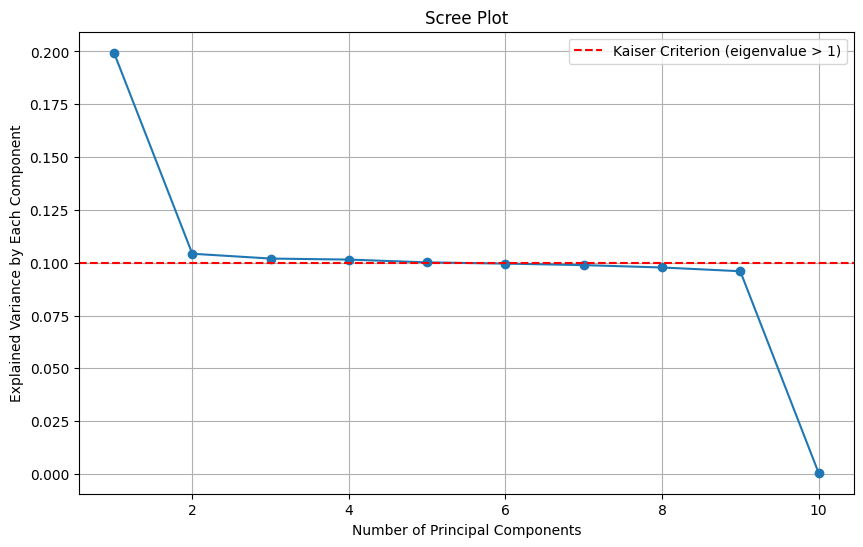

In [28]:
# Generate scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance by Each Component')
plt.axhline(y=1/len(pca.explained_variance_ratio_), color='r', linestyle='--', label='Kaiser Criterion (eigenvalue > 1)')
plt.grid(True)
plt.legend()
plt.show()

# Scikit-learn developers. (n.d.)
# W3Schools.com. (n.d.)

#### D3: Variance of each of the principal components

In [29]:
# Extract the variance explained by the number of principal components as determined by the Kaiser criterion
variance_by_component = pca.explained_variance_ratio_[:num_components_kaiser]
for i, variance in enumerate(variance_by_component, 1):
    print(f"PC{i}: {variance:.4f} or {variance * 100:.2f}% of the total variance")



PC1: 0.1994 or 19.94% of the total variance
PC2: 0.1042 or 10.42% of the total variance
PC3: 0.1020 or 10.20% of the total variance
PC4: 0.1015 or 10.15% of the total variance
PC5: 0.1002 or 10.02% of the total variance


#### D4: Identify the Total Variance Captured by the Principal Components Identified in Part D2

In [30]:
# Calculate the total variance captured by the first 5 principal components
total_variance_captured = np.sum(variance_by_component)
print(f"\nTotal variance captured by the first 5 components: {total_variance_captured:.4f} or {total_variance_captured * 100:.2f}%")



Total variance captured by the first 5 components: 0.6072 or 60.72%


#### D5: Summary of Analysis

Based on the Kaiser criterion, I retained the first 5 principal components for my PCA analysis. These components together explain 60.72% of the total variance in the dataset. This indicate a significant reduction in dimensionality while still capturing a substantial amount of information. The variance explained by each of the components highlights their relative importance, with PC1 explaining the most variance and PC5 the least of the selected components.

This reduction enables me to focus on the most meaningful patterns in the data, which can be particularly useful for further analysis. For example clustering or predictive modeling. By understanding the major drivers of variance captured by these components, we can gain insights into underlying factors that might be influencing customer behavior. I have pinpointed the most influential variables shaping customer behavior. This reduction highlights critical factors like tenure, monthlycharges, and usage patterns, suggesting their significant role in customer differentiation and potential churn. By analyzing these components, I identify key customer attributes that contribute to variance, enabling targeted retention strategies. Furthermore by providing a foundation for deeper insights into customer behavior and guiding more effective decision making to mitigate churn risk. This analysis not only aids in simplifying complex datasets, but also in uncovering potential areas for strategic decision making for the executives.


#### E1: Third-Party Source

No third-party source used

#### F1: Source

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. https://doi.org/10.1098/rsta.2015.0202

Scikit-learn developers. (n.d.). Principal component analysis (PCA). scikit-learn. Retrieved April 3, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

W3Schools.com. (n.d.). Python Machine Learning - Getting Started. Retrieved April 3, 2024, from https://www.w3schools.com/python/python_ml_getting_started.asp
